In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense

2022-09-03 01:01:22.600800: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-03 01:01:22.600818: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Обучающая выборка

In [2]:
c=np.array([-40,-10,0,8,15,22,38])
f=np.array([-40,14,32,46,59,72,100])

Модель

In [3]:
model = keras.Sequential([
    Dense(units=1,input_shape=(1,) ,activation='linear'),
])

2022-09-03 01:01:23.791667: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-03 01:01:23.791889: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-03 01:01:23.791947: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-03 01:01:23.791994: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-03 01:01:23.792038: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Компиляция модели и определение метода оценки и оптимизатора

In [4]:
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(0.1))

Оптимизация модели

In [5]:
history = model.fit(c,f,epochs=500,verbose=False)

Граффики

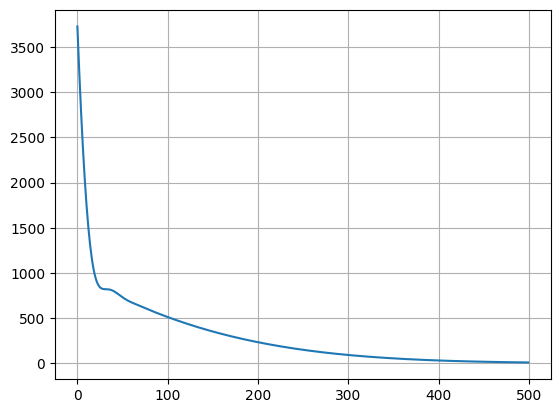

In [6]:
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

Использование сети

In [7]:
model.predict([156])

1/1 [==============================] - 0s 74ms/step


array([[2883.0156]], dtype=float32)

Веса модели

In [8]:
print(model.get_weights())

[array([[1.8236865]], dtype=float32), array([28.94626], dtype=float32)]
